In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Apr  5 08:51:38 2020

@author: mor
"""
import pandas as pd
import numpy as np
import json
import folium
import datetime
import tempfile 
import webbrowser, os
from folium.plugins import Draw,Search,MousePosition 
import geopandas as gpd
import geojson as gj
import math
from geopy.distance import geodesic
from shapely.geometry import Polygon, Point, LinearRing ,MultiLineString
import pickle
import shapely.wkt as swkt
import pyproj
from functools import partial
from shapely.ops import transform
import matplotlib.pyplot as plt

In [2]:

pd.set_option('display.max_columns', 8)


In [3]:
BASE = os.getcwd()
HTML= os.path.join(BASE,'html')
DATA = os.path.join(BASE,'data')
POLYGONS=os.path.join(DATA,'polygons')
SHAPE = os.path.join(BASE,'shape')
BUS = os.path.join(BASE,'bus_zones')

In [4]:

#open folium in the browser
def open_in_browser(m,filename=None,dir_file=HTML):
    tmp=tempfile.NamedTemporaryFile(delete=False)
    now = datetime.datetime.now()
    timenow='_'+str(now.strftime("%Y-%m-%d_%H%M"))
    if filename:
        path=filename+timenow+'.html'
        path=os.path.join(dir_file, path)
    else:
        path=tmp.name+'.html'
        
    m.save(path)
    webbrowser.open('file://' + path)




# Folium examples


In [5]:

df_acc = pd.read_csv(DATA+'/accidents_2005_to_2007.csv', dtype=object)


In [6]:
df_acc.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,...,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680,178240,-0.19117,...,1,Yes,E01002849,2005
1,200501BS00002,524170,181650,-0.211708,...,1,Yes,E01002909,2005
2,200501BS00003,524520,182240,-0.206458,...,1,Yes,E01002857,2005
3,200501BS00004,526900,177530,-0.173862,...,1,Yes,E01002840,2005
4,200501BS00005,528060,179040,-0.156618,...,1,Yes,E01002863,2005


In [7]:
df_acc.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

## Basic map

In [8]:

# Uses lat then lon for center the map. 
# The bigger the zoom number, the closer in you get
m = folium.Map(location=[51.5074, -0.0878],zoom_start = 11) 

# Map to display
m 



### Open in browser tab


In [9]:

open_in_browser(m)


### Map tiles

In [10]:

m = folium.Map(location=[51.5074, -0.0878],tiles = "Stamen Terrain", zoom_start = 12)
m


In [11]:

m = folium.Map(location=[51.5074, -0.0878], tiles = "Stamen Toner", zoom_start = 12)
m


In [12]:

m = folium.Map(location=[51.5074, -0.0878],
                        tiles = "OpenStreetMap",
                        zoom_start = 13)

folium.Marker([51.5079, -0.0877], popup='London Bridge').add_to(m)

m


### Basic markers and interactive marker

In [13]:

# Set the map up
m = folium.Map(location=[51.5079, -0.0877],
                        zoom_start = 9)
# Simple marker
folium.Marker([51.5079, -0.0877], 
              popup='London Bridge', 
              icon=folium.Icon(color='green')
             ).add_to(m)

# Circle marker
folium.CircleMarker([51.4183, 0.2206],
                    radius=30,
                    popup='East London',
                    color='red',
                    ).add_to(m)

# Interactive marker
m.add_child(folium.ClickForMarker(popup="New marker"))

m


In [14]:
from folium import plugins
from folium.plugins import MeasureControl
from folium.plugins import FloatImage

m = folium.Map(location=[51.5079, -0.0877], zoom_start = 11)

# Add tool to the top right
m.add_child(MeasureControl())

# Add image to map
url = ('https://thumbs.gfycat.com/AgreeableReliableFishingcat-small.gif')
FloatImage(url, bottom=5, left=75).add_to(m)

m


### Custom Markers

In [15]:
from folium.plugins import BeautifyIcon

m = folium.Map(location=[51.5079, -0.0877],
    
                        zoom_start = 9)

folium.Marker([51.5079, -0.0877],
              popup='London Bridge',
              icon=folium.Icon(color='green')
             ).add_to(m)

folium.Marker([51.5183, 0.5206], 
              popup='East London',
              icon=folium.Icon(color='red',icon='university', prefix='fa') 
             ).add_to(m)

folium.Marker([51.5183, 0.3206], 
              popup='East London',
              icon=folium.Icon(color='blue',icon='bar-chart', prefix='fa') 
             ).add_to(m)
    

#BeautifyIcon plugins

#marker lightblue
icon = BeautifyIcon(background_color='#AFF',icon='', icon_shape='marker')
marker = folium.Marker(location=[51.5183, -0.3206], popup=folium.Popup('marker'),icon=icon).add_to(m)

#marker lightblue with arrow
marker2 = folium.Marker(location=[51.3183, -0.3206], popup=folium.Popup('marker2')).add_to(m)
BeautifyIcon(background_color='#AFF',icon='arrow-down', icon_shape='marker').add_to(marker2)

#marker red with number
number_icon = BeautifyIcon(text_color='#000', border_color='transparent',
                               background_color='#F01', number=10,
                               inner_icon_style='font-size:10px;padding-bottom:-5px;')

marker3 = folium.Marker(location=[51.5183, -0.2206], popup=folium.Popup('marker3'),icon=number_icon).add_to(m)    
m

## Folium heatmap

### Data preprocess for heatmap

In [16]:

df_acc['Latitude'] = df_acc['Latitude'].astype(float)
df_acc['Longitude'] = df_acc['Longitude'].astype(float)
df_acc = df_acc.dropna(axis=0, subset=['Latitude','Longitude'])

# Filter the DF for rows, then columns, then remove NaNs
heat_df = df_acc[df_acc['Speed_limit']=='40'].copy() # Reducing data size so it runs faster
heat_df = heat_df[heat_df['Year']=='2007'] # Reducing data size so it runs faster
heat_df = heat_df[['Latitude', 'Longitude']]

# List comprehension to make out list of lists
heat_data = [[row['Latitude'],row['Longitude']] for index, row in heat_df.iterrows()]


### Static heatmap

In [18]:
from folium import plugins
from folium.plugins import HeatMap

m = folium.Map(location=[51.5074, -0.1278],zoom_start = 12) 

# Plot it on the map
HeatMap(heat_data).add_to(m)

# Display the map
m

### Heatmap with time

In [19]:
print(heat_df.columns)
print(df_acc['Date'].iloc[0])

Index(['Latitude', 'Longitude'], dtype='object')
04/01/2005


In [20]:
# Create Month column, using date
heat_df['Month'] = df_acc['Date'].str[3:5]
heat_df['Month'] = heat_df['Month'].astype(int)
heat_df = heat_df.dropna(axis=0, subset=['Latitude','Longitude', 'Month'])

heat_data=[]

#loop on months
for i in range(1,13):
    coords = heat_df[heat_df['Month'] == i][['Latitude','Longitude']].values.tolist()
    heat_data.append(coords)


In [21]:

from folium import plugins

m = folium.Map(location=[51.5074, -0.1278],
                    zoom_start = 12) 

# Plot it on the map
hm = plugins.HeatMapWithTime(heat_data,auto_play=True,max_opacity=0.8)
hm.add_to(m)
# Display the map
m



## Folium extra


### Add draw tool and mouse position

In [22]:

from folium.plugins import Draw,MousePosition

m = folium.Map(location=[51.5074, 0.1278],zoom_start = 13) 

formatter = "function(num) {return L.Util.formatNum(num, 3) + ' .. ';};"

MousePosition(
    position='topright',
    separator=' | ',
    empty_string='NaN',
    lng_first=True,
    num_digits=20,
    prefix='Coordinates:',
    lat_formatter=formatter,
    lng_formatter=formatter
).add_to(m)

draw = Draw()
draw.add_to(m)    

m

### Marker cluster and group of objects

In [23]:

from folium.plugins import MarkerCluster

m = folium.Map(location=[51.5074, 0.1278],zoom_start = 7) 

mcg = folium.plugins.MarkerCluster(control=False)   # Marker Cluster, hidden in controls
g1 = folium.plugins.FeatureGroupSubGroup(mcg, 'g1') # First group, in mcg
g2 = folium.plugins.FeatureGroupSubGroup(mcg, 'g2') # Second group, in mcg
m.add_child(mcg)
m.add_child(g1)
m.add_child(g2)

g1.add_child(folium.Marker([51.0074, 0.1278]))
g2.add_child(folium.Marker([51.3074, 0.1278]))
folium.LayerControl().add_to(m)
m




### Display polygons by times


In [24]:
import folium
from folium.plugins import TimestampedGeoJson

m = folium.Map(location=[52.467697, -2.548828], zoom_start=6)

polygon_1 = {
    'type': 'Feature',
    'geometry': {
        'type': 'MultiPolygon',
        'coordinates': [((
             (-2.548828, 51.467697),
             (-0.087891, 51.536086),
             (-1.516113, 53.800651),
             (-6.240234, 53.383328),
        ),)] * 6, # duplicatation for matching 6 timestamps
    },
    'properties': {
        'style': {
            'color': 'blue',
        },
        'times': ['2015-07-22T00:00:00', '2015-08-22T00:00:00',
                  '2015-09-22T00:00:00', '2015-10-22T00:00:00',
                  '2015-11-22T00:00:00', '2015-12-22T00:00:00']
    }
}

polygon_2 = {
    'type': 'Feature',
    'geometry': {
        'type': 'MultiPolygon',
        'coordinates': [((
             (-3.548828, 50.467697),
             (-1.087891, 50.536086),
             (-2.516113, 52.800651),
             (-7.240234, 52.383328),
        ),)] * 2, # duplicatation for matching 2 timestamps
    },
    'properties': {
        'style': {
            'color': 'yellow',
        },
        'times': ['2015-07-22T00:00:00', '2015-08-22T00:00:00']
    }
}

TimestampedGeoJson(
    {'type': 'FeatureCollection', 'features': [polygon_1, polygon_2]},
    period='P1M',
    duration='P1M',
    auto_play=False,
    loop=False,
    loop_button=True,
    date_options='YYYY/MM/DD',
).add_to(m)
    
m

# Geographic distance

## Distance between coordinates using geopy

In [25]:

from geopy.distance import geodesic
newport_ri = (41.49008, -71.312796)
cleveland_oh = (41.499498, -81.695391)
print(geodesic(newport_ri, cleveland_oh).miles)

def distance_coordinates(lat1,long1,lat2,long2):
    point1 = (lat1,long1)
    point2 = (lat2,long2)
    return geodesic(point1, point2).meters


538.3904453677205


In [26]:
df2007 = df_acc[df_acc.Year=='2007'].copy()
df2007.loc[:,'Month'] = df2007.Date.str[3:5]
df2007.loc[:,'Month'] = df2007['Month'].astype(int)


## Use dask with geopy example

In [27]:
lat,lon = df2007[['Latitude','Longitude']].mean(axis=0)

In [28]:
%%time
import pandas as pd
import dask.dataframe as dd
ddata = dd.from_pandas(df2007, npartitions=8)

ddata['distance']=ddata[['Latitude','Longitude']].map_partitions(lambda df: df.apply(lambda row: distance_coordinates(row['Latitude'],row['Longitude'],lat,lon),axis=1),meta=('result', float))

df2007.loc[:,'distance'] = ddata['distance'].compute(scheduler='processes')

Wall time: 17.9 s


##### Dask is slow for this calculation

In [29]:
df2007[['Accident_Index','distance']].sort_values('Accident_Index').head()

,Accident_Index,distance
549312,2.01E+07,203209.539024
498746,2.01E+08,118779.819253
547645,2.01E+100,187413.083245
498769,2.01E+101,118393.662629
547646,2.01E+101,207863.422362


## Use Numba with haversine distance

##### Calculate with Numba distance between pairs - faster


In [30]:
from numba import jit

#return distacne in meter
@jit(nopython=True)
def haversine_distance(s_lat,s_lng,e_lat,e_lng):
    # approximate radius of earth in km
    R = 6371

    s_lat = np.deg2rad(s_lat)                    
    s_lng = np.deg2rad(s_lng)     
    e_lat = np.deg2rad(e_lat)                       
    e_lng = np.deg2rad(e_lng)  
    d = np.sin((e_lat - s_lat)/2)**2 + np.cos(s_lat)*np.cos(e_lat) * np.sin((e_lng - s_lng)/2)**2
    return 2 * R * np.arcsin(np.sqrt(d)) * 1000

##### Run example with numba *** faster but less accurate

In [31]:
%%time

coord1 = np.array([lat,lon])[np.newaxis,]

coods = df2007[['Latitude','Longitude']].values
distances = haversine_distance(coord1[:,0], coord1[:,1], coods[:,0], coods[:,1])

Wall time: 395 ms


In [32]:
df2007.loc[:,'distance2']=distances

In [33]:
df2007[['Accident_Index','distance','distance2']].sort_values('Accident_Index').head()

,Accident_Index,distance,distance2
549312,2.01E+07,203209.539024,203078.828571
498746,2.01E+08,118779.819253,118527.480233
547645,2.01E+100,187413.083245,187269.666703
498769,2.01E+101,118393.662629,118141.788282
547646,2.01E+101,207863.422362,207735.513397





# Geographic formats analyzed
##### Shapefile, json, geojson etc. 




In [34]:

import json

haifa_district = os.path.join(SHAPE, 'haifatest.json')
haifa = os.path.join(SHAPE, 'haifa.json')

geo_json_data1 = json.load(open(haifa_district))   
geo_json_data2 = json.load(open(haifa))   



In [35]:

m = folium.Map([32.6530, 34.9915], zoom_start=10)

folium.GeoJson(geo_json_data1[0]['geojson'],style_function=lambda feature: {'fillColor': 'red','fillOpacity': 1}).add_to(m)
folium.GeoJson(geo_json_data2['geometries'][0],style_function=lambda feature: {'fillColor': 'blue','fillOpacity': 0.2}).add_to(m)
     
m       



## Display ploygons

In [36]:
import os
import json
from folium import plugins

center = os.path.join(SHAPE, 'center.json')
haifa = os.path.join(SHAPE, 'haifa.json')
jerusalem = os.path.join(SHAPE, 'jerusalem.json')
Judea_and_Samaria = os.path.join(SHAPE, 'Judea and Samaria.json')
north = os.path.join(SHAPE, 'north.json')
south = os.path.join(SHAPE, 'south.json')
telaviv = os.path.join(SHAPE, 'telaviv.json')

jsonlist=[center,haifa,jerusalem,Judea_and_Samaria,north,south,telaviv]
colors=['#00ffff','#ff0000','#993300','yellow','#00ff00','green','#cc66ff']
m = folium.Map([31.0461, 34.8516], zoom_start=7)       

group = folium.FeatureGroup(name='Israel')   
m.add_child(group)
i=0
for j in jsonlist:    
    geo_json_data = json.load(open(j))
    g = folium.plugins.FeatureGroupSubGroup(group, str(j[6:-5])) 
    m.add_child(g)
    
    fillColor=colors[i]
    style_function=lambda feature,fillColor=fillColor: {
        'fillColor': fillColor ,
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5'
    }
    folium.GeoJson(geo_json_data,style_function=style_function).add_to(g)
    i+=1
folium.LayerControl().add_to(m)
m


### Combine polygons to one polygon


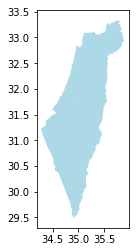

In [37]:
%matplotlib inline
import geopandas as gpd
from shapely.ops import cascaded_union

df_center=gpd.read_file(center)
df_haifa=gpd.read_file(haifa)
df_jerusalem=gpd.read_file(jerusalem)
df_Judea_and_Samaria=gpd.read_file(Judea_and_Samaria)
df_north=gpd.read_file(north)
df_south=gpd.read_file(south)
df_telaviv=gpd.read_file(telaviv)

polygons = [df_center.iloc[0].geometry, df_haifa.iloc[0].geometry, df_jerusalem.iloc[0].geometry, df_Judea_and_Samaria.iloc[0].geometry, df_north.iloc[0].geometry, df_south.iloc[0].geometry, df_telaviv.iloc[0].geometry]
israel_boundary = gpd.GeoSeries(cascaded_union(polygons))
israel_boundary.plot(color = 'lightblue')
plt.show()

In [38]:
##Create shapefile 
#israel_boundary.to_file(SHAPE+"/israel_boundary.shp")

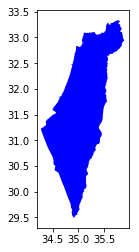

In [39]:

israel_boundary=gpd.read_file(SHAPE+"/israel_boundary.shp")
israel_boundary.plot(color = 'blue')
plt.show()




### Bus station in beer sheva - separate geojson

In [40]:
#shape=pd.read_csv('israel-public-transportation/shapes.txt')
stops=pd.read_csv('israel-public-transportation/stops.txt')

#latllong=shape[shape.shape_id==9000][['shape_pt_lat','shape_pt_lon']].values
stops_latlon=stops[stops.zone_id==9000][['stop_lat','stop_lon']].values


m = folium.Map([31.245344, 34.788481], zoom_start=13)  
for coor in stops_latlon:
    folium.Marker(coor,popup=str(coor)).add_to(m)    
m

### Shapefile with zones for bus stations

In [41]:
import json

zones = os.path.join(BUS, 'zones.geojson')

io = open(zones,encoding='utf-8')
geo_json_data = json.load(io)   

m = folium.Map([31.2530, 34.7915], zoom_start=8)
group = folium.FeatureGroup(name='Israel')   
m.add_child(group)

for f in geo_json_data['features']:
    geo_json_data_new=geo_json_data.copy()
    geo_json_data_new['features']=[f]
    name=geo_json_data_new['features'][0]['properties']['ZName'].replace('ת"א','תל אביב')
    print(name)
    g = folium.plugins.FeatureGroupSubGroup(group, str(name)) 
    m.add_child(g)
   
    folium.GeoJson(geo_json_data_new).add_to(g)

folium.LayerControl().add_to(m)
m

חיפה טבעת מרכזית
מרחב הנגב - מצפה רמון שדה בוקר
באר שבע טבעת 3 - דרום הר חברון
י-ם טבעת 3- קרית ארבע
באר שבע טבעת 2מיתר  עומר תל שבע
תל אביב טבעת מרכזית
תל אביב טבעת 3 דרום - גדרה -  אשדוד
באר שבע טבעת 3 - שדרות_שער הנגב
באר שבע טבעת 2 -להבים רהט
באר שבע טבעת 2 -אופקים חצרים
באר שבע טבעת 3 - ירוחם_רמת הנגב
ואדי ערה חדרה
חיפה טבעת 3 צפון - נהריה- מעלות תרשיחא
אריאל
תל אביב טבעת 2 צפון - השרון
ואדי ערה אום אל פחם
מרחב הצפון הגולן- קרית שמונה - קצרין
חיפה טבעת 3 תיכונה דרומית - נצרת - מגדל
חיפה טבעת 3 דרום- זכרון יעקב
י-ם טבעת 2-אפרת-תקוע
מרחב הנגב-אילת
מודיעין-מודיעין עילית
י-ם טבעת 3 - בית שמש  מ.א מטה יהודה מזרח
חיפה טבעת 2 דרום - יקנעם- קרית טבעון
חיפה טבעת 2 צפון -עכו
מרחב הנגב - הערבה
באר שבע טבעת 3- דימונה ערד
י-ם טבעת 3 - צ. אלמוג
מטה בנימין ודרום הבקעה
תל אביב טבעת 2 דרום - רחובות - נס ציונה
השפלה-אשקלון
באר שבע טבעת מרכזית
השפלה-קרית גת
תל אביב טבעת 3 צפון - נתניה
מרחב הצפון - טבריה
חיפה טבעת 3 תיכונה - כרמיאל- סח'נין
עפולה
בית שאן
י-ם טבעת 2 - מעלה מכמש - בית אל
י-ם טבעת מרכזית

In [42]:

def swapCoord(li):
    newli=[]
    if li:
        if len(li[0])==2:
            for i in li:
                newli.append([i[1],i[0]])
    return newli



### Convert itm coordinates to wgs

In [43]:


import itm

def test_wgs842itm():
    assert itm.wgs842itm(32.3, 35.7) == (689686, 266124)


def test_itm2wgs84():
    lat, lng = itm.itm2wgs84(689686, 266124)
    assert round(lat, 5) == 32.3
    assert round(lng, 5) == 35.7

def convert_list(li):
    newli=[]
    for item in li:
        lat, lng= itm.itm2wgs84(item[1],item[0])
        newli.append(((lng, lat)))
    return newli
        


## Statistical Areas

### Load statistical areas

In [44]:

df3=gpd.read_file(SHAPE+"/stat_2008_NEW_04Nov_1335_fix.shp")


In [45]:
def get_json(path=POLYGONS):
    for name in os.listdir(path):
        if name.endswith('.json') and name[-6].isdigit():
            yield os.path.join(path, name)

def read_json(path):
    io = open(path,encoding='utf-8')
    geo_json_data = json.load(io)
    return  geo_json_data

def get_json_by_number(numbers,path=POLYGONS):
    numbers_str =[str(x) for x in numbers]
    for name in os.listdir(path):
        if name.endswith('.json') and name[:-5] in numbers_str:
            yield os.path.join(path, name) 

def get_polygons_by_semel(semels):
    data=[]    
    for l in get_json_by_number(semels):
            data.append(read_json(l))
    return data

In [46]:
 
semels=[9000]
data=get_polygons_by_semel(semels)[0]

data_list=get_polygons_by_semel(semels)
data=data_list[0]


In [47]:

poly_bs=Polygon(data['9000']['geojson']['coordinates'][0])


### Find intersection between two statistical areas

In [48]:

bs_411=df3[np.logical_and(df3.SEMEL_YISH==9000,df3.STAT08==411)].iloc[0].geometry

intersection = poly_bs.intersection(bs_411)
print(intersection)


MULTIPOLYGON (((34.75321127777202 31.26114249607064, 34.75309896393165 31.2611891906789, 34.75320466465035 31.261148130625, 34.75321127777202 31.26114249607064)), ((34.75902985346003 31.24165432671342, 34.758996 31.24234, 34.7589139 31.2429238, 34.7586143 31.243712, 34.756115 31.2482391, 34.7557274 31.2491653, 34.755567 31.2499862, 34.7557336 31.2524948, 34.7554334 31.2525125, 34.7553779 31.2525306, 34.7553532 31.2524854, 34.755273 31.2525214, 34.7547581 31.2520649, 34.7537255 31.2554092, 34.7540172 31.2556332, 34.7535339 31.2559797, 34.7530335 31.2577938, 34.7523189 31.2605962, 34.7530871 31.2606598, 34.7532803 31.2611138, 34.75321929483873 31.26113916296594, 34.75322570562 31.26113918547586, 34.75352023589549 31.26102297190116, 34.75385684717126 31.2608888671382, 34.754077797334 31.26079043232054, 34.75417245953319 31.26075468791016, 34.75418295851861 31.26075472469637, 34.75420408495179 31.26072774162195, 34.75444598953062 31.2606383986098, 34.75462481431757 31.26056687241978, 34.75

In [49]:

m = folium.Map(location=[31.2530, 34.7915], zoom_start=13)

geo=folium.GeoJson(poly_bs,style_function=lambda feature: {'fillColor': 'blue','fillOpacity': 0.2})
popup = folium.Popup(str('code: '+str('bs')))
popup.add_to(geo)
geo.add_to(m)

geo=folium.GeoJson(bs_411,style_function=lambda feature: {'fillColor': 'red','fillOpacity': 0.2})
popup = folium.Popup(str('code: '+str('411')))
popup.add_to(geo)
geo.add_to(m) 

geo=folium.GeoJson(intersection,style_function=lambda feature: {'fillColor': 'green','fillOpacity': 1})
popup = folium.Popup(str('code: '+str('intersection')))
popup.add_to(geo)
geo.add_to(m)  

m
